In [1]:
import matplotlib.pyplot as plt
import sdnist

1. Load the public dataset :

In [2]:
public_data, schema = sdnist.census(public=True)
public_data

,PUMA,YEAR,HHWT,GQ,PERWT,SEX,AGE,MARST,RACE,HISPAN,...,WORKEDYR,INCTOT,INCWAGE,INCWELFR,INCINVST,INCEARN,POVERTY,DEPARTS,ARRIVES,sim_individual_id
0,17-1001,2012,88.0,1,61.0,1,21,6,1,0,...,3,14000,14000,0,0,14000,118,902,909,12
1,17-1001,2012,61.0,1,85.0,1,21,6,1,0,...,3,18000,0,0,0,18000,262,732,744,33
2,17-1001,2012,54.0,1,54.0,1,21,6,1,0,...,3,14000,14000,0,0,14000,118,642,654,401
3,17-1001,2012,106.0,1,69.0,1,21,6,1,0,...,3,3800,3800,0,0,3800,262,0,0,470
4,17-1001,2012,31.0,1,56.0,1,21,6,1,0,...,3,14000,14000,0,0,14000,501,0,0,702
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1035196,39-4300,2018,103.0,1,90.0,2,37,1,9,0,...,3,36000,36000,0,0,36000,231,1605,1624,556291
1035197,39-4106,2018,207.0,1,207.0,2,41,6,9,0,...,3,52800,52000,0,0,52000,361,1005,1019,1139708
1035198,17-2200,2018,73.0,1,58.0,2,46,4,9,0,...,2,25800,0,0,0,0,200,0,0,346052
1035199,17-2300,2018,47.0,1,47.0,2,46,1,9,0,...,3,5000,5000,0,0,5000,399,732,754,40265


2. Compute k-marginal scores :

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 50/50 [00:05<00:00,  9.12it/s]


[CensusKMarginalScore(694),
 CensusKMarginalScore(848),
 CensusKMarginalScore(946)]

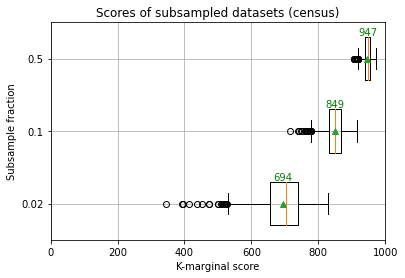

In [3]:
fracs = (0.02, 0.1, 0.5)
scores = []

for i, frac in enumerate(fracs):
    synthetic_data = public_data.sample(frac=frac)
    score = sdnist.score(public_data, synthetic_data, schema, challenge="census")
    scores.append(score)
    score.boxplot(idx=i, name=str(frac))
    
plt.ylabel("Subsample fraction")
plt.xlabel("K-marginal score")
plt.title(f"Scores of subsampled datasets (census)")
plt.savefig("census_subsample.pdf")

scores

3. Display the k-marginal score

In [4]:
# As a map (only works on the public dataset - IL/OH)
scores[0].html(schema)